# P105 Computational Homework 1 solutions

## Question 1: Fourier Series

### Learning objectives
In this question you will:

- understand how a function can be expanded in a series
- see how the accuracy of an approximation improves with the number of terms


The set of square-integrable functions ($\int |f(x)|^2dx<\infty$) on the interval $[0,\lambda]$ make up a _Hilbert space_, which is a vector space with an inner product that satisfies certain properties. In this case the space is known as $L^2([0,\lambda])$, with inner product $\langle f,g\rangle = \int_0^\lambda f(x)g(x)\:dx$.

With $k_n=n\frac{2\pi}{\lambda}$, the functions $c_n = \cos(k_nx)$ and $s_n =\sin(k_nx)$ form a __complete and orthogonal basis__ of this Hilbert space, known as the _Fourier basis_. Orthogonality means \begin{align} \langle c_m,c_n\rangle &=C_n\delta_{m,n},\\\langle s_m,s_n\rangle &=S_n\delta_{m,n},\\\langle c_n,s_m\rangle &= 0,\end{align} and completeness means $$\forall f\in L^2([0,\lambda]),\quad f = \sum_{n=0}^\infty\left(\frac{\langle f,c_n\rangle}{C_n} c_n+\frac{\langle f,s_n\rangle}{S_n} s_n\right).$$ This means that any square-integrable function $f(x)$ on a finite domain can be written as a sum of sines and cosines, $$f(x)=\sum_{n=0}^\infty\big(A_n\cos(k_nx)+B_n\sin(k_nx)\big).$$ Furthermore, we are guaranteed that at all points $x$ where $f$ is continuous, the above sum converges (so the terms $A_n\cos(k_nx)+B_n\sin(k_nx)$ decrease sufficiently quickly). This can be extended to periodic functions in the obvious manner.

(We have formulated things in terms of $x$, suggesting a "spatial" variable, but of course this holds for functions of any variable. When the variable is "time", the symbols used are conventionally $t$, $\omega$, and $T$ instead of $x$, $k$, and $\lambda$. Also, $s_0=0$ and is implicitly excluded from the above sums.)

### 1a. 

Find the Fourier coefficients $A_n$ and $B_n$ of a square function, which is a common periodic signal: $$f(x)=\begin{cases}f_0&\text{if }a\le x\le b\\f_1&\text{else}\end{cases},$$ for $0\le a\le b\le\lambda$.

Hint: adding a constant to a function only changes the $A_0$ term.

#### <font color='red'>Solution:</font>

First let's define $g(x)=f(x)-f_1$. Since $g-f=c_0$, orthogonality guarantees that the Fourier coefficients of $g$ are the same as those of $f$ for $n>0$. For $n>0$,\begin{align}\langle f,c_n\rangle &= \langle g,c_n\rangle=\int_0^\lambda g(x)\cos(k_nx)\:dx=(f_0-f_1)\int_a^b\cos(k_nx)\:dx=\frac{f_0-f_1}{k_n}\big(\sin(k_nb)-\sin(k_na)\big),\\\langle f,s_n\rangle &=\langle g,s_n\rangle= \int_0^\lambda g(x)\sin(k_nx)\:dx=(f_0-f_1)\int_a^b\sin(k_nx)\:dx=\frac{f_0-f_1}{k_n}\big(\cos(k_na)-\cos(k_nb)\big),\end{align} and $\langle f,c_0\rangle = \int_0^\lambda f(x)\:dx = (b-a)f_0+(\lambda+a-b)f_1$. Thus \begin{align}A_n &= \begin{cases}\lambda f_1+(b-a)(f_0-f_1)&\text{if }n=0\\\frac{2(f_0-f_1)}{n\lambda}\big(\sin(k_nb)-\sin(k_na)\big)&\text{if }n>0\end{cases},\\B_n &= \frac{2(f_0-f_1)}{n\lambda}\big(\cos(k_na)-\cos(k_nb)\big).\end{align}

### 1b. 

While we have exact equality in the $n\rightarrow\infty$ limit, with finite resources we may only compute a finite number of terms. Plot the true signal, on top of the approximations with 2, 5, 10, and 100 terms. Set $a=\frac{\lambda}{2}$, $b=\lambda$, $\lambda=2\pi$, and $f_0=-f_1=1$.

#### <font color='red'>Solution:</font>

C:\Users\Benjamin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Benjamin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in multiply
C:\Users\Benjamin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in multiply


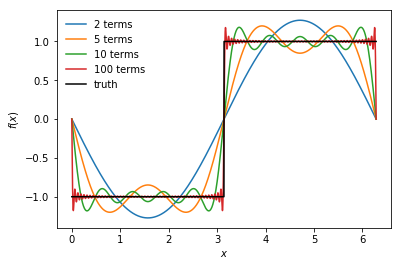

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ns = [2,5,10,100]
N = Ns[-1]

lam = 2*np.pi
a,b = 0.5*lam,lam
f0,f1 = 1,-1

n = np.arange(N+1) #array of n
k = 2*np.pi*n/lam #array of k_n
fac = 2*(f0-f1)/n/lam #multiplicative factor
A = fac*(np.sin(k*b)-np.sin(k*a))
A[0] = lam*f1+(b-a)*(f0-f1)
B = fac*(np.cos(k*a)-np.cos(k*b))
B[0]=0

A = A.reshape((-1,1))
B = B.reshape((-1,1))
x = np.linspace(0,lam,100*N+1) #mesh for plotting
square = np.where((a<=x)&(x<=b),f0,f1) #array of true function values
phase = k.reshape((-1,1))*x.reshape((1,-1)) #2d array of k[i]*x[j]
s_fourier = A*np.cos(phase)+B*np.sin(phase) #2d array of fourier terms

for m in Ns:
    plt.plot(x, np.sum(s_fourier[:m],axis=0), label="%d terms"%m) #relevant partial sum of fourier terms
plt.plot(x, square, label="truth", c="k")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False)

The oscillation of truncated Fourier series around discontinuities is known as _Gibbs ringing_.

### 1c. 

Now compute the Fourier series representation of the triangular function, $$f(x)=\begin{cases}x&\text{if }0\le x\le\frac{\lambda}{4}\\\frac{\lambda}{2}-x&\text{if }\frac{\lambda}{4}\le x\le\frac{3\lambda}{4}\\x-\lambda&\text{if }\frac{3\lambda}{4}\le x\le\lambda\end{cases},$$ periodically continued.

Hint: Use integration by parts.

#### <font color='red'>Solution:</font>

In general, if $\frac{d}{dx}F(x)=f(x)$, since $\frac{d}{dx}(xF(x))=xf(x)+F(x)$,$$\int_a^b x f(x)dx=\int_a^b\left(\frac{d}{dx}(xF(x))-F(x)\right)=bF(b)-aF(a)-\int_a^bF(x)dx.$$

For all $n$, $\langle f,c_n\rangle=0$ since $f$ is odd and $c_n$ is even. The argument in more detail goes like this: for a periodic function $g(x)$ such that $g(-x)=-g(x)$, $$\int_0^\lambda g(x)dx=\int_{-\frac{\lambda}{2}}^\frac{\lambda}{2} g(x)dx=\int_0^\frac{\lambda}{2}(g(x)+g(-x))dx=0.$$ ll that remains is to check that $f(-x)=-f(x)$: for $0\le x \le \lambda$, $$f(-x)=f(\lambda-x)=\begin{cases}\lambda-x&\text{if }0\le \lambda-x\le\frac{\lambda}{4}\\-\frac{\lambda}{2}+x&\text{if }\frac{\lambda}{4}\le \lambda-x\le\frac{3\lambda}{4}\\-x&\text{if }\frac{3\lambda}{4}\le\lambda-x\le\lambda\end{cases}=-f(x).$$

Now, \begin{align}\langle f,s_n\rangle&=\int_0^\lambda f(x)\sin(k_nx)dx=\int_0^\frac{\lambda}{4} x\sin(k_nx)dx+\int_\frac{\lambda}{4}^\frac{3\lambda}{4} \left(\frac{\lambda}{2}-x\right)\sin(k_nx)dx+\int_\frac{3\lambda}{4}^\lambda (x-\lambda)\sin(k_nx)dx\\&=\int_0^\frac{\lambda}{4} x\sin(k_nx)dx-\int_{-\frac{\lambda}{4}}^\frac{\lambda}{4} y\sin(n\pi-k_ny)dy+\int_{-\frac{\lambda}{4}}^0 y\sin(k_ny-2\pi n)dy\\&=(1+\cos(\pi n))\int_{-\frac{\lambda}{4}}^\frac{\lambda}{4} x\sin(k_nx)dx,\end{align} where we have used the fact that $\sin(a-b)=\cos(b)\sin(a)-\cos(a)\sin(b)$, and that $\sin(\pi n)=0$. Since $\cos(\pi n)=(-1)^n$ and $$\int_{-\frac{\lambda}{4}}^\frac{\lambda}{4}x\sin(k_nx)dx=-\frac{\lambda}{4k_n}\left(\cos\!\left(\tfrac{\pi}{2}n\right)+\cos\!\left(-\tfrac{\pi}{2}n\right)\right)+\frac{1}{k_n}\int_{-\frac{\lambda}{4}}^\frac{\lambda}{4}\cos(k_nx)dx=-\frac{\lambda}{2k_n}\cos\!\left(\tfrac{\pi}{2}n\right)+\frac{2}{k_n^2}\sin\!\left(\tfrac{\pi}{2}n\right),$$ we have $$B_n=\frac{2}{\lambda}\langle f,s_n\rangle=\begin{cases}\frac{2\lambda}{\pi^2n^2}\sin\!\left(\tfrac{\pi}{2}n\right)&\text{if $n$ is odd}\\0&\text{if $n$ is even}\end{cases}=\begin{cases}\frac{(-1)^m2\lambda}{\pi^2n^2}&\text{if $n=2m+1$}\\0&\text{else}\end{cases}$$

### 1d. 

Plot the true signal for the triangular function, on top of the approximations with 2, 5, 10, and 100 terms. Again, set $\lambda=2\pi$.

#### <font color='red'>Solution:</font>

C:\Users\Benjamin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\Benjamin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


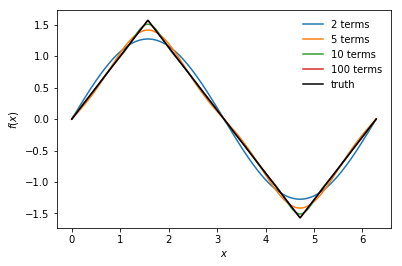

In [2]:
tB = 2*lam/np.pi**2/n**2*np.sin(np.pi*n/2)
tB = tB.reshape((-1,1))
tB[0] = 0

triangle = np.where(x<=lam/4,x,np.where(x<=3*lam/4,lam/2-x,x-lam))
t_fourier = tB*np.sin(phase)

for m in Ns:
    plt.plot(x, np.sum(t_fourier[:m],axis=0), label="%d terms"%m)
plt.plot(x, triangle, label="truth", c="k")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False)

### 1e. 

For each of the functions whose Fourier series you have computed, estimate the absolute value of the overshoot or undershoot at the kink or discontinuity caused by the Gibbs phenomenon as a function of the number of terms in the series. Plot your results on the sample plot for each $n\le 100$, with the errors in a log-scale.

Hint: if you used a fine enough resolution for your plotting array ($k_n\Delta x\ll 1$), just find the sampled overshoot by e.g. comparing the maximum/minimum sampled value to the true max/min.

#### <font color='red'>Solution:</font>

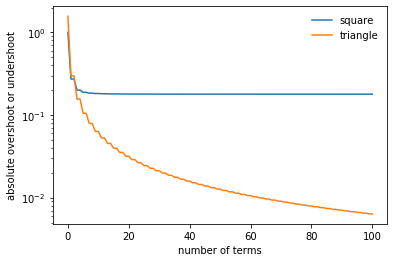

In [92]:
sf = np.cumsum(s_fourier,axis=0) #2d array of partial Fourier sums
s_max = np.amax(sf, axis=1) #1d array of maximum sampled values
s_error = np.abs(s_max-1)

tf = np.cumsum(t_fourier,axis=0) #2d array of partial Fourier sums
t_max = np.amax(tf, axis=1) #1d array of maximum sampled values
t_error = np.abs(lam/4-t_max)

plt.plot(n, s_error, label="square")
plt.plot(n, t_error, label="triangle")
plt.legend(frameon=False)
plt.ylabel("absolute overshoot or undershoot")
plt.xlabel("number of terms")
plt.yscale("log")